# Homework 1
This homework consists of three parts, each of which is rated at 10 points:
* Numpy (10 points)
* Matplotlib (10 points)
* Linear Regression (10 points)

The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

**Deadline: FILL_THE_GAP**

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# task 1 (1 point)

"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([0, 2, 0, 3])
output: 3
"""
def max_after_zero(x: np.array) -> int:
    y = x[::-1] #переворачиваем вектор
    return np.amax(np.take(y, np.where(y[1:] == 0))) #возращаем максимальный элемент, за которым стоит нолик
    assert False, 'not implemented'

In [3]:
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


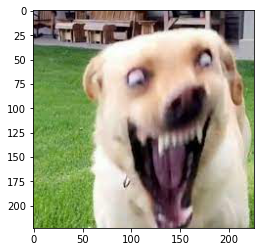

In [4]:
import requests #код с консультации
from PIL import Image
from io import BytesIO
%matplotlib inline
url = "https://i.postimg.cc/gJDZb5QM/Unknown.jpg"
response = requests.get(url)
img_before = np.asarray(Image.open(BytesIO(response.content)))
plt.imshow(img_before)

In [5]:
# task 2 (1 point)

"""
description: given an image (height, width, numChannels) and weights (numChannels)
Sums the image channels with the specified weights and return the result as
a size matrix (height, width).

Give an example of how the function works – convert a color image to shades of 
gray using np.array coefficients([0.299, 0.587, 0.114]). 
Take a cool picture for the joy of the assistant and draw it 
before and after the transformation.
"""

def grayscale(img: np.array, weights: np.array) -> np.array:
    return np.dot(img, weights) #в каждом векторе 3 элемента: складываем их с заданными весами
    assert False, 'not implemented'


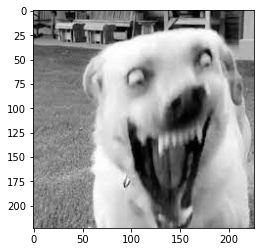

In [6]:
plt.imshow(grayscale(img_before, np.array([0.299, 0.587, 0.114])), cmap=plt.get_cmap('gray')) #отображаем изображение, преобразованное с помощью написанной ранее функции

In [7]:
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

OK


In [8]:
# task 3 (2 points)

"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    x = np.concatenate([block[1], block[1]]) # (для наглядности, новые переменные могут замедлять работу кода) делаем две переменные с элементами будущей матрицы по шаблону
    y = np.concatenate([block[0], block[0]])    
    return np.matrix([y, x, y, x]) #выводим блочную матрицу 
    assert False, 'not implemented'


In [9]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


In [10]:
# task 4 (2 points)

"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    return np.prod(np.diag(matrix)[np.diag(matrix)!=0]) #сначала находим все элменты диагонали, потом с помощью условия на индексы отбираем из них ненулевые и перемножаем все полученные числа из эррэя
    assert False, 'not implemented'


In [11]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


In [12]:
# task 5 (2 points)

"""
description: this class implements StandardScaler from the sklearn library
As input, the fit method accepts a matrix where the signs are arranged in
columns, the fit method must remember mu and sigma for each of the signs,
and the transform must normalize the matrix with the pre-calculated mu and sigma.
"""
class StandardScaler:
    def fit(self, X: np.array):
        mu = np.mean(X, axis = 0) #находим среднее с помощью функции из нампая по столбцам
        sigma = np.std(X, axis = 0) #аналогично находим сигму
        return mu, sigma #возращаем результат (так-то это необязательный шаг, ведь данные мы сохранили, но у нас есть функция transform, которой понадобятся эти данные)
        assert False, 'not implemented'
            
    def transform(self, X: np.array) -> np.array:
        return (X - StandardScaler().fit(X)[0]) / StandardScaler().fit(X)[1] #по формуле частное мю - икс и сигмы находим и выводим результат в виде матрицы того же размера, что и заданная
        assert False, 'not implemented'

In [13]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


In [14]:
# task 6 (2 points)

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    x = np.polyint(coefs) #находим полином первообразной с помощью встроенной функции нампая
    x[-1] = 42 #меняем последний элемент на 42 по условию
    return x #выводим нампаевский аррэй
    assert False, 'not implemented'
    
print(antiderivative(np.array([4, 6, 0, 1])))

[ 1.  2.  0.  1. 42.]


In [15]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [16]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

### Task 1 (5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose mu and sigma on your choice). Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): draw a circle centered in mu with a radius such that 0.99 of all points fall there, also draw a circle with a radius of 3 sigma. Draw a point mu in a separate color.

Use subplot to draw histograms with 10 buckets for each dimension and draw a density graph along the histogram.

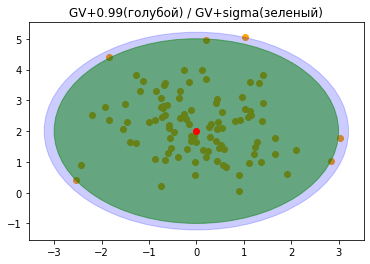

In [17]:
mean = (0, 2) #you chooose
scal = 1.0
GV = np.random.normal(loc=mean, scale = scal, size=(100, 2))#задаем вектор с определенными заранее мю и сигмой нужного размера



plt.title('GV+0.99(голубой) / GV+sigma(зеленый)') #осмысленное название


plt.scatter(GV[:, 0], GV[:, 1], color='orange') #размещаем выборку 

Rad = np.max(np.sqrt((np.transpose(GV) [0] - mean[0])**2 + (np.transpose(GV) [1] - mean[1])**2)) #вычисляем радиус окружности, который будет равен расстоянию от токи мю до самой далекой от нее точки, при таком раскладе она точно не попадает в окружность, а так как всего точек 100, то получается, что 99% лежат в окружности (безусловно, есть исключения при котором более одной точки максимально удалены от начальной, но это уже детали)
cir = plt.Circle(mean, Rad, color='blue') #задаем параметры круга
plt.gca().add_patch(cir) #рисуем круг
cir.set_alpha(0.2) #делаем круг полупрозрачным

cirs = plt.Circle(mean, scal * 3, color='green') #рисуем радиус с радиусом из тройной сигмы
plt.gca().add_patch(cirs) #дорисовываем
cirs.set_alpha(0.5) #делаем круг полупрозрачным
plt.scatter(x=mean[0], y=mean[1], color='red') #выделяем точку мю другим цветом

plt.show() #показываем график, хотя в юпитере можно жить и без этой функции

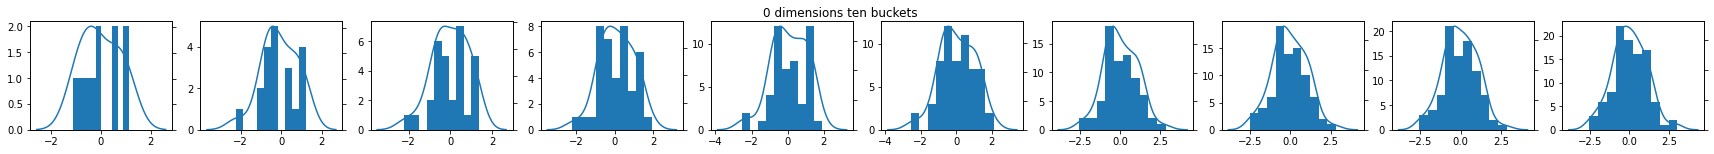

In [18]:
####Я СДЕЛАЛ ЭТОТ ПУНКТ НЕПРАВИЛЬНО(ВЕРНЫЙ ОТВЕТ ДАЛЕЕ), НО МНЕ БЫЛО ЖАЛКО УДАЛЯТЬ)

fig, ax = plt.subplots(1, 10, figsize=(30,2)) #создаем десять графиков подходящего размера
GV0 = np.array([np.transpose(GV)[0][:10], np.transpose(GV)[0][:20], np.transpose(GV)[0][:30], np.transpose(GV)[0][:40], np.transpose(GV)[0][:50], np.transpose(GV)[0][:60], np.transpose(GV)[0][:70], np.transpose(GV)[0][:80], np.transpose(GV)[0][:90], np.transpose(GV)[0][:100]], dtype=object)
#создаем вектор из векторов со значениями из нужного измерения, в конце ставим dtype object, чтобы на нас не ругались
ax[0].hist(GV0[0]) #рисуем гистограмму для заданной выборки
ax0 = ax[0].twinx() #создаем параллельную ось ордината
sns.kdeplot(GV0[0], ax=ax0) #рисуем на ней график плотности
ax0.set(ylabel=None) #избавляемся от подписи графика плотности
ax0.set_yticklabels([]) # удаляем подписи для оси плотности, чтобы не мозолили глаза
#повторяем для остальных графиков
ax[1].hist(GV0[1])
ax1 = ax[1].twinx()
sns.kdeplot(GV0[1], ax=ax1)
ax1.set(ylabel=None)
ax1.set_yticklabels([])

ax[2].hist(GV0[2])
ax2 = ax[2].twinx()
sns.kdeplot(GV0[2], ax=ax2)
ax2.set(ylabel=None)
ax2.set_yticklabels([])

ax[3].hist(GV0[3])
ax3 = ax[3].twinx()
sns.kdeplot(GV0[3], ax=ax3)
ax3.set(ylabel=None)
ax3.set_yticklabels([])

ax[4].hist(GV0[4])
ax4 = ax[4].twinx()
sns.kdeplot(GV0[4], ax=ax4)
ax4.set(ylabel=None)
ax4.set_yticklabels([])

ax[5].hist(GV0[5])
ax5 = ax[5].twinx()
sns.kdeplot(GV0[5], ax=ax5)
ax5.set(ylabel=None)
ax5.set_yticklabels([])

ax[6].hist(GV0[6])
ax6 = ax[6].twinx()
sns.kdeplot(GV0[6], ax=ax6)
ax6.set(ylabel=None)
ax6.set_yticklabels([])

ax[7].hist(GV0[7])
ax7 = ax[7].twinx()
sns.kdeplot(GV0[7], ax=ax7)
ax7.set(ylabel=None)
ax7.set_yticklabels([])

ax[8].hist(GV0[8])
ax8 = ax[8].twinx()
sns.kdeplot(GV0[8], ax=ax8)
ax8.set(ylabel=None)
ax8.set_yticklabels([])

ax[9].hist(GV0[9])
ax9 = ax[9].twinx()
sns.kdeplot(GV0[9], ax=ax9)
ax9.set(ylabel=None)
ax9.set_yticklabels([])

plt.suptitle("0 dimensions ten buckets") #называем группу графиков
plt.show() #выводим результат

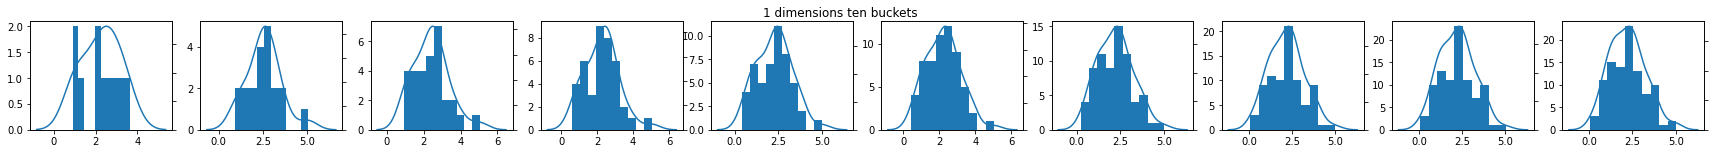

In [19]:
####Я СДЕЛАЛ ЭТОТ ПУНКТ НЕПРАВИЛЬНО(ВЕРНЫЙ ОТВЕТ ДАЛЕЕ), НО МНЕ БЫЛО ЖАЛКО УДАЛЯТЬ)
fig, ax = plt.subplots(1, 10, figsize=(30,2)) #в этой части все то же самое, что и в предыдущей за исключением измерения, которое мы выбираем
GV1 = np.array([np.transpose(GV)[1][:10], np.transpose(GV)[1][:20], np.transpose(GV)[1][:30], np.transpose(GV)[1][:40], np.transpose(GV)[1][:50], np.transpose(GV)[1][:60], np.transpose(GV)[1][:70], np.transpose(GV)[1][:80], np.transpose(GV)[1][:90], np.transpose(GV)[1][:100]], dtype=object)

ax[0].hist(GV1[0])
ax0 = ax[0].twinx()
sns.kdeplot(GV1[0], ax=ax0)
ax0.set(ylabel=None)
ax0.set_yticklabels([])

ax[1].hist(GV1[1])
ax1 = ax[1].twinx()
sns.kdeplot(GV1[1], ax=ax1)
ax1.set(ylabel=None)
ax1.set_yticklabels([])

ax[2].hist(GV1[2])
ax2 = ax[2].twinx()
sns.kdeplot(GV1[2], ax=ax2)
ax2.set(ylabel=None)
ax2.set_yticklabels([])

ax[3].hist(GV1[3])
ax3 = ax[3].twinx()
sns.kdeplot(GV1[3], ax=ax3)
ax3.set(ylabel=None)
ax3.set_yticklabels([])

ax[4].hist(GV1[4])
ax4 = ax[4].twinx()
sns.kdeplot(GV1[4], ax=ax4)
ax4.set(ylabel=None)
ax4.set_yticklabels([])

ax[5].hist(GV1[5])
ax5 = ax[5].twinx()
sns.kdeplot(GV1[5], ax=ax5)
ax5.set(ylabel=None)
ax5.set_yticklabels([])

ax[6].hist(GV1[6])
ax6 = ax[6].twinx()
sns.kdeplot(GV1[6], ax=ax6)
ax6.set(ylabel=None)
ax6.set_yticklabels([])

ax[7].hist(GV1[7])
ax7 = ax[7].twinx()
sns.kdeplot(GV1[7], ax=ax7)
ax7.set(ylabel=None)
ax7.set_yticklabels([])

ax[8].hist(GV1[8])
ax8 = ax[8].twinx()
sns.kdeplot(GV1[8], ax=ax8)
ax8.set(ylabel=None)
ax8.set_yticklabels([])

ax[9].hist(GV1[9])
ax9 = ax[9].twinx()
sns.kdeplot(GV1[9], ax=ax9)
ax9.set(ylabel=None)
ax9.set_yticklabels([])

plt.suptitle("1 dimensions ten buckets")
plt.show()

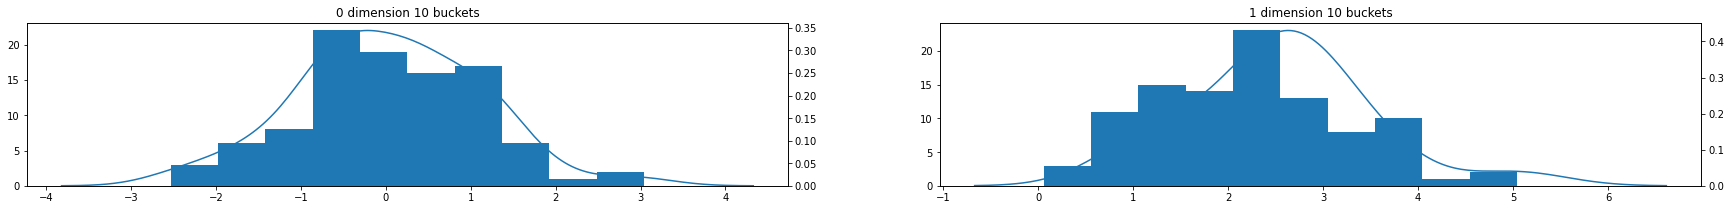

In [20]:
#это правильное решение
Gv0 = np.transpose(GV)[0] #выбираем координаты по первому пространству
Gv1 = np.transpose(GV)[1] #выбираем координаты по второму пространству

fig, ax = plt.subplots(1, 2, figsize=(30, 3)) #задаём параметры графика

ax[0].hist(Gv0) #рисуем гистограмму по выбранной области
ax0 = ax[0].twinx() #создаем параллельную ось ординат 
sns.kdeplot(Gv0, ax=ax0) #рисуем график плотности
ax0.set(ylabel=None) #избавляемся от названия графика плотности
plt.title('0 dimension 10 buckets') #называем график
#далее повторяем те же самые шаги
ax[1].hist(Gv1) 
ax1 = ax[1].twinx()
sns.kdeplot(GV1[1], ax=ax1)
ax1.set(ylabel=None)
plt.title('1 dimension 10 buckets')

plt.show() #показываем график

### Task 2 (5 points)

Upload the dataset from the last seminar [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Build a **heatmap** with correlations between features, rows and columns should be signed with feature names. It is important to use matplotlib. The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use plt.xticks, plt.yticks, plt.imshow, plt.colorbar

Also build the same heatmap using seaborn.heatmap

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

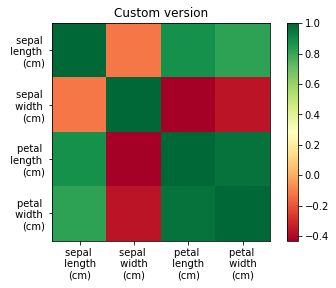

In [22]:
cor = iris['data'].corr() #с помощью встроенной функции находим всевозможные корреляции
labels = ['sepal \n length \n(cm)', 'sepal \n width \n(cm)', 'petal \n length \n(cm)', 'petal \n width \n(cm)'] #это просто список из названия осей
plt.imshow(cor, cmap='RdYlGn') #рисуем график с подходящей расцветкой
x = [0, 1, 2, 3] #помещаем в массив значения осей
y = [0, 1, 2, 3] #помещаем в массив значения осей
plt.xticks(x, labels) #меняем названия по оси x
plt.yticks(y, labels) #меняем названия по оси y
plt.colorbar() #добавляем колорбар
plt.title('Custom version') #называем график
plt.show() #показываем его

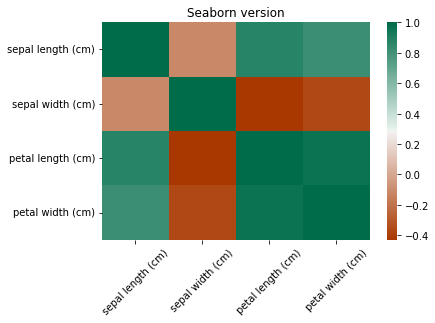

In [23]:
col = sns.diverging_palette(20, 150, s=100, l=40, as_cmap = True) #создаем кастомную палитру, которая будет напоминать предыдущую (и будет даже лучше из-за белого цвета посерединке)
sns.heatmap(iris['data'].corr(), cmap = col) #строим график с желаемой расцветкой
plt.xticks(rotation = 45) #для читаемости слегка наклоним названия на оси x
plt.title('Seaborn version') #называем его
plt.show() #выводим 

## Part 3. Linear Regression
In this part, you need to implement a class with an analytical solution of linear regression and use all the skills you have acquired.

You are allowed to use any libraries: sklearn, numpy, matplotlib, scipy, etc.

Conclusions are needed for each step, only the code will be rated at 0 points

Load a dataset using np.loadtxt and split it into train and test

In [24]:
 !wget -O 'data' -q https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv #достаем данные

In [25]:
from sklearn.model_selection import train_test_split #достаем трэин
#data = np.loadtxt('data', delimiter=',', dtype=str) - я могу считать данные и так, ошибка не происходит, но через пандас действительно проще
data = pd.read_csv('data') #считываем данные

y = data['y'] #определяем данные
X = data.iloc[:, 1:] #определяем фичи

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Разделяем на трэин и тест как на семинаре

Plot the dependence of the target on the features and distributions of features, correlations and and everything that you think is important **(2 points)**

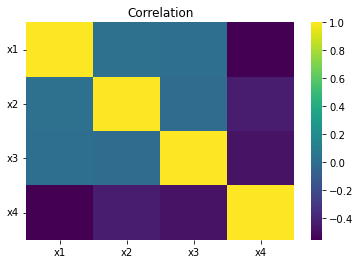

In [26]:
col = sns.color_palette("viridis", as_cmap = True) #рисуем хитмап по аналогии с прошлым заданием
sns.heatmap(X.iloc[:, 1:].corr(), cmap = col) 
plt.yticks(rotation = 0) 
plt.xticks(rotation = 0) 
plt.title('Correlation')
plt.show() 
#Можно заметить, что фичи скореллированы или слабо положительно или слабо отрицательно

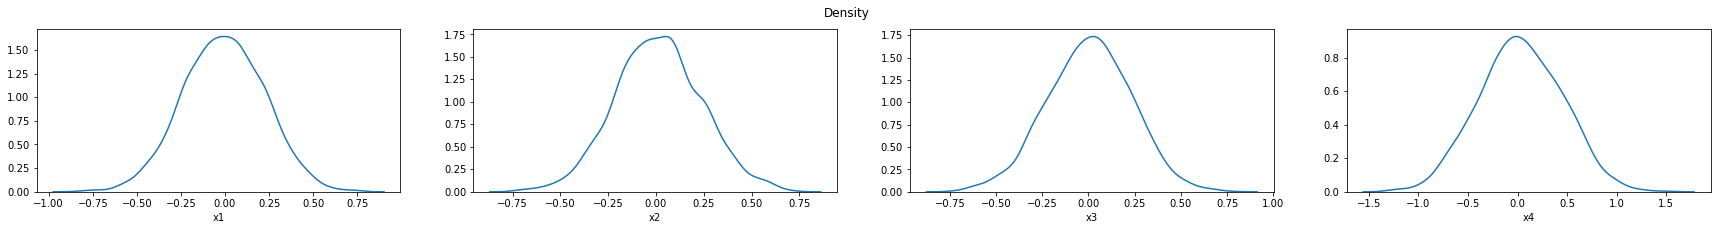

In [27]:
fig, ax = plt.subplots(1, 4, figsize=(30, 3)) #рисуем графики плотности по аналогии с предыдущим заданием

sns.kdeplot(X['x1'], ax=ax[0])
ax[0].set(ylabel=None)

sns.kdeplot(X['x2'], ax=ax[1])
ax[1].set(ylabel=None)

sns.kdeplot(X['x3'], ax=ax[2])
ax[2].set(ylabel=None)

sns.kdeplot(X['x4'], ax=ax[3])
ax[3].set(ylabel=None)

plt.suptitle('Density')
plt.show()
#Можно заметить, что у всех фичей, кроме x0 примерно одинаковое распределение

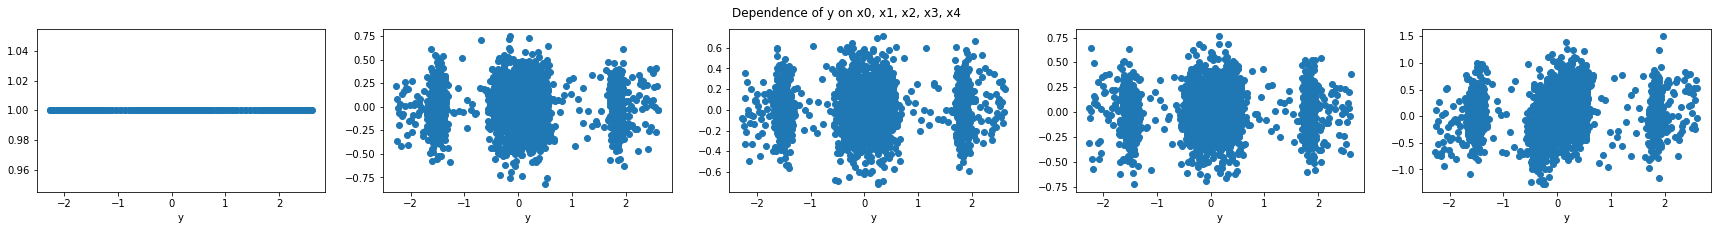

In [28]:
fig, ax = plt.subplots(1, 5, figsize=(30, 3)) #задаем графики

ax[0].scatter(y, X['x0'])#рисуем каждый из них как множество точек с координатами значениями y и xi соответственно
ax[0].set_xlabel('y') #подписываем нижню ось
ax[1].scatter(y, X['x1'])
ax[1].set_xlabel('y')
ax[2].scatter(y, X['x2'])
ax[2].set_xlabel('y')
ax[3].scatter(y, X['x3'])
ax[3].set_xlabel('y')
ax[4].scatter(y, X['x4'])
ax[4].set_xlabel('y')

plt.suptitle('Dependence of y on x0, x1, x2, x3, x4') #подписываем график
plt.show()#показываем
#Можно заметить, что у всех фичей, за ислключением x0, есть особенность: они расположены в трех группах, так что для каждого значения фичи существует три значения y, расположенных в разных группках(это нестрогое суждение: естественно, есть исключения)

Implement a linear regression class, normalize features if needed and fit model **(2 points)**

In [29]:
class MyLinearRegression:
    def fit(self, X_train, y_train):
        X = X_train #возращаем (запоминаем) вектор w, формула с лекции
        return np.dot(np.dot(np.linalg.matrix_power(np.dot(np.transpose(X), X), -1), np.transpose(X)), y_train) / np.sum(np.dot(np.dot(np.linalg.matrix_power(np.dot(np.transpose(X), X), -1), np.transpose(X)), y_train))
        assert False, 'not implemented'
    
    def predict(self, X_test): #делаем предсказание по тестовым данным
        return np.dot(X_test, MyLinearRegression().fit(X_train, y_train))
        assert False, 'not implemented'

In [30]:
from sklearn.preprocessing import normalize #будем нормализовать тренировочную выборку
w = MyLinearRegression().fit(normalize(X_train, axis=0), y_train)

Try to come up with a way to understand which feature contributes more to your model **(3 points)**

Здесь я использовал несколько методов, один я нашел на ютубе(https://www.youtube.com/watch?v=Y9nN_6sbXkM), другой придумал сам и вроде он дает тот же результат

In [31]:
print(w * [np.std(X['x0']), np.std(X['x1']), np.std(X['x2']), np.std(X['x3']), np.std(X['x4'])])
#Заимствованный метод
#В данном методе мы умножаем коэффициенты, найденные с помощью fit, на стандартные отклонения соответствующих фичей
#Теперь мы можем их сравнить и сделать вывод, что фича x4 больше всего влияет на результаты модели, а x0 - меньше всего

[0.         0.04819944 0.03980255 0.04872429 0.1641021 ]


In [32]:
X.corrwith(y)
#Можно заметить, что корреляция отдельных фичей с y дает такой же результат: x4 скореллирован наиболее сильно

x0         NaN
x1    0.005634
x2    0.009242
x3   -0.000140
x4    0.107652
dtype: float64

In [33]:
from sklearn.metrics import explained_variance_score
#мой метод: подсчитаем точность модели, засовывая в x_train только фичи определенного вида
#та, у которой абсолютная величина наибольшая - и будет наиболее сильно влияющей на результаты модели
#для каждой выборки повторим процесс 1000 раз для усреднения оценки, а потом посчитаем среднеарифметическое от полученного

In [34]:
y = data['y'] 
X = data.iloc[:, [1]] 
l = []
#нам говорили, что запрет на циклы был только в первой части, поэтому для экономии умственных усилий здесь и далее я воспользуюсь циклом фор
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    MyLinearRegression().fit(normalize(X_train, axis=0), y_train)
    y_pred = MyLinearRegression().predict(X_test)
    l.append(explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
np.sum(l) / len(l)

-4.218847493575595e-18

In [35]:
y = data['y'] 
X = data.iloc[:, [2]] 
l = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    MyLinearRegression().fit(normalize(X_train, axis=0), y_train)
    y_pred = MyLinearRegression().predict(X_test)
    l.append(explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
np.sum(l) / len(l)

-0.048548540770430096

In [36]:
y = data['y'] 
X = data.iloc[:, [3]] 
l = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    MyLinearRegression().fit(normalize(X_train, axis=0), y_train)
    y_pred = MyLinearRegression().predict(X_test)
    l.append(explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
np.sum(l) / len(l)

-0.04448960179022716

In [37]:
y = data['y'] 
X = data.iloc[:, [4]] 
l = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    MyLinearRegression().fit(normalize(X_train, axis=0), y_train)
    y_pred = MyLinearRegression().predict(X_test)
    l.append(explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
np.sum(l) / len(l)

-0.0495568138186332

In [38]:
y = data['y'] 
X = data.iloc[:, [5]] 
l = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    MyLinearRegression().fit(normalize(X_train, axis=0), y_train)
    y_pred = MyLinearRegression().predict(X_test)
    l.append(explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
np.sum(l) / len(l)

-0.0817446852505318

In [39]:
#Здесь у фичи x4 тоже оказалось наибольшее абсолютное значение, следовательно, она наиболее сильно влияет на результаты модели 

Plot the dependence on the size of the training sample and the mse score **(1 point)**

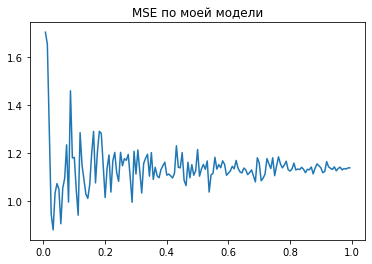

In [40]:
from sklearn.metrics import mean_squared_error


Size = np.arange(0.00625, 1, 0.00625) #этот вектор будет разбивкой оси 0x
ms = [] #сюда добавляем результаты вычислений от аргументов из Size
for i in Size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i)
    MLR = MyLinearRegression()
    w = MLR.fit(normalize(X_train, axis=0), y_train)
    y_ = np.dot(X_test, w)
    ms.append(mean_squared_error(y_test, y_))

plt.plot(Size, ms)
plt.title('MSE по моей модели')
plt.show()
  

Fit LinearRegression model from sklearn. Try to get the minimum MSE score as possible. Compare results with your model **(1 point)**

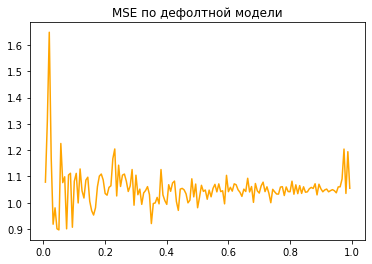

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Size = np.arange(0.00625, 1, 0.00625)
ms1 = []
for i in Size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=  i)
    y_ = LinearRegression().fit(X_train, y_train).predict(X_test)
    ms1.append(mean_squared_error(y_test, y_))
plt.plot(Size, ms1, color='orange')
plt.title('MSE по дефолтной модели')
plt.show()



In [42]:
min_mse = np.min(ms1)
print('Минимальный MSE:', min_mse, 'при размере трэина:', Size[ms1.index(min_mse)] * 100, '%')

Минимальный MSE: 0.8965580128650271 при размере трэина: 5.0 %


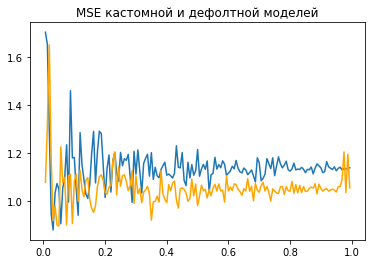

In [43]:
plt.plot(Size, ms)
plt.plot(Size, ms1, color='orange')
plt.title('MSE кастомной и дефолтной моделей')
plt.show()
#Дефолтная выглядит получше, мы сравнили результаты между моделями по ошибкам, которые они выдают

Describe the challenges you had to face :) **(1 point)**

In [44]:
# Я столкнулся с ужасным количеством сложностей в домашке в целом: от того, как вывести серую картинку в первой части, до того, как правильно оформит график в матплотлибе
# В последней части пришлось разбираться не только с техническими вопросами, но и с качественными
# Если при сплите и построении начальных графиков проблем не возникло, то они появились, когда пришлось разрабатывать способ определить наиважнейшую фичу
# Здесь мне пришлось применить какое-то творчество, которое мне показалось разумным и воспользоваться результатами профессионалов, чтобы подтвердить правильность моего метода
# Сравнение моделей я произвел по сравнению их ошибок, в этом сложностей не возникло, но вполне вероятно, что я выбрал не самый эффективный метод
# В целом, самая долгая и сложная домашка за время моего обучения в университете